In [99]:
import librosa

In [100]:
y, sr = librosa.load('C:/nmb/nada/Jongho/checkpoints/18-04-2021_18h/synth_audio/200_batch_synth_class_1.wav')
# y, sr = librosa.load('C:/nmb/nmb_data/new_data_1000/F_0.wav')

In [101]:
print(y)
print(len(y))
print('Sampling rate (kHz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

[ 0.00440903  0.00453605 -0.00228042 ... -0.00807331  0.00410179
  0.00102137]
114688
Sampling rate (kHz): 22050
Audio length (seconds): 5.20


In [102]:
import sounddevice as sd

sd.play(y, sr)

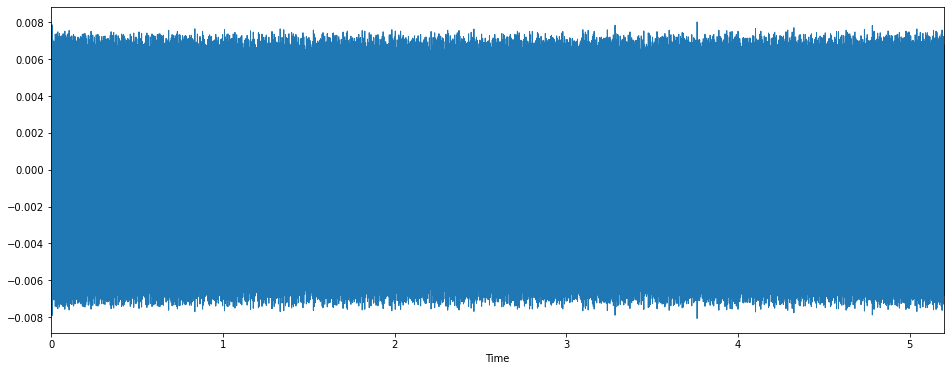

In [103]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

(1025, 225)


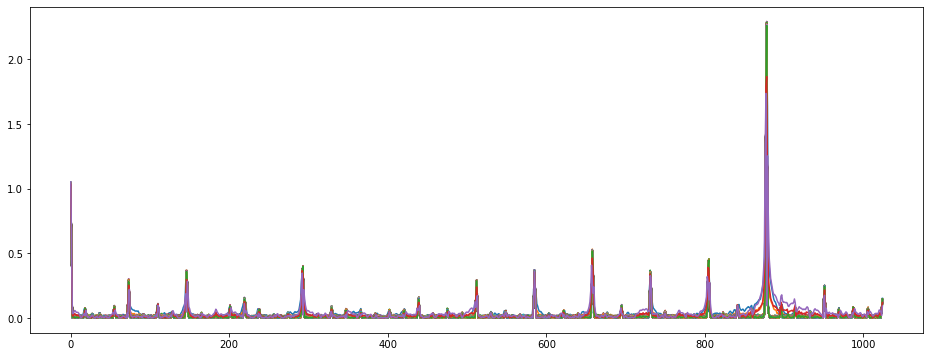

In [104]:
import numpy as np

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

print(D.shape)

plt.figure(figsize=(16, 6))
plt.plot(D)
plt.show()

C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ai\Anaconda3\lib\site-packages\librosa\display.py:845: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


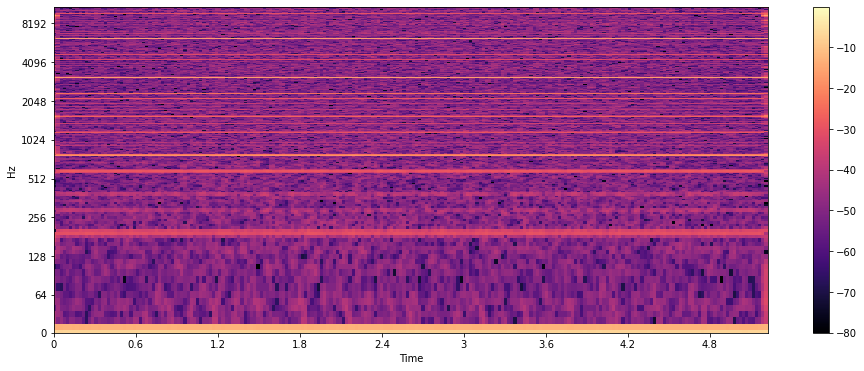

In [105]:
DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

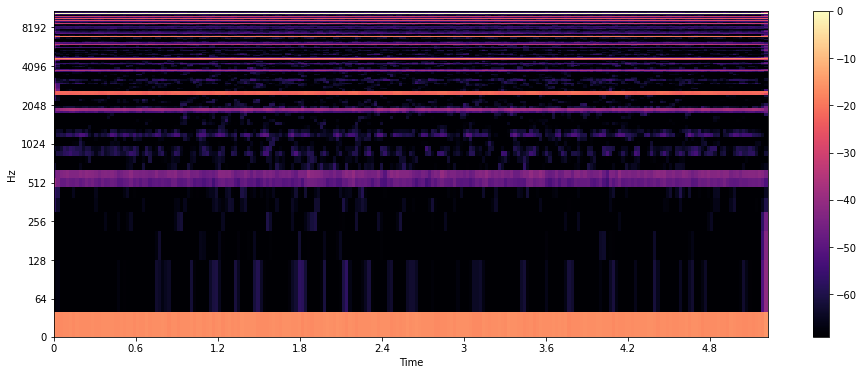

In [106]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

In [107]:
tempo, _ = librosa.beat.beat_track(y, sr=sr)
print(tempo)

92.28515625
C:\Users\ai\Anaconda3\lib\site-packages\librosa\beat.py:308: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  win_length = np.asscalar(core.time_to_frames(ac_size, sr=sr,


In [108]:
zero_crossing = librosa.zero_crossings(y, pad=False)

print(zero_crossing)
print(sum(zero_crossing))

[False False  True ...  True  True False]
84002


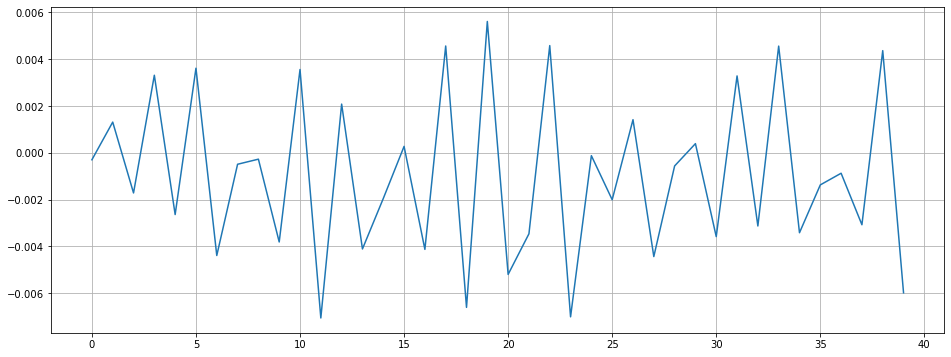

In [109]:
n0 = 9000
n1 = 9040

plt.figure(figsize=(16, 6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

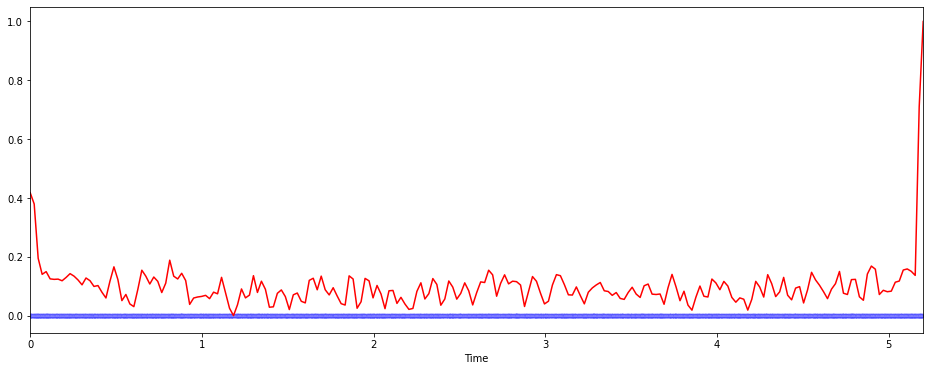

In [110]:
spectral_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroid))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroid), color='r')
plt.show()

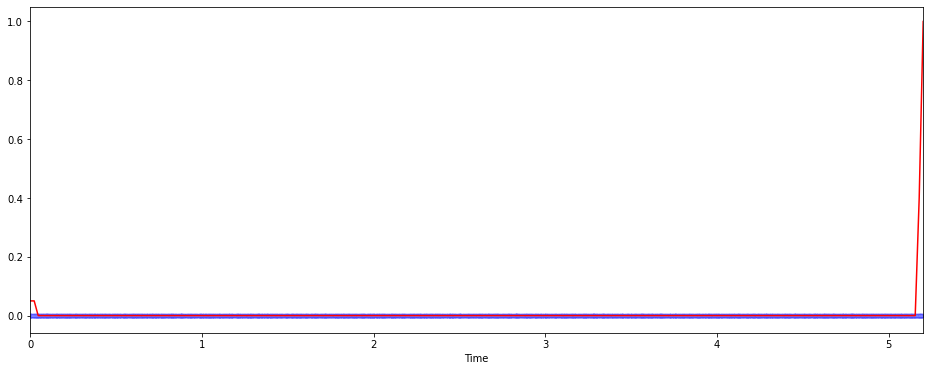

In [111]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

mean: 0.47
var: 0.044938


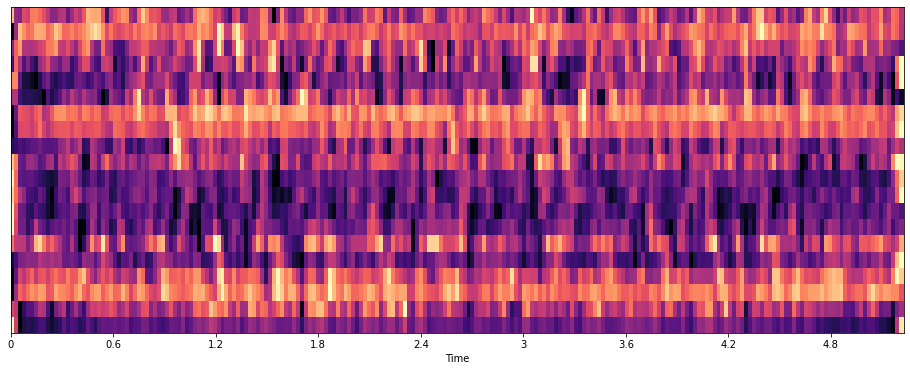

In [112]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs, axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %2f' % mfccs.var())

plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

C:\Users\ai\Anaconda3\lib\site-packages\librosa\core\pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


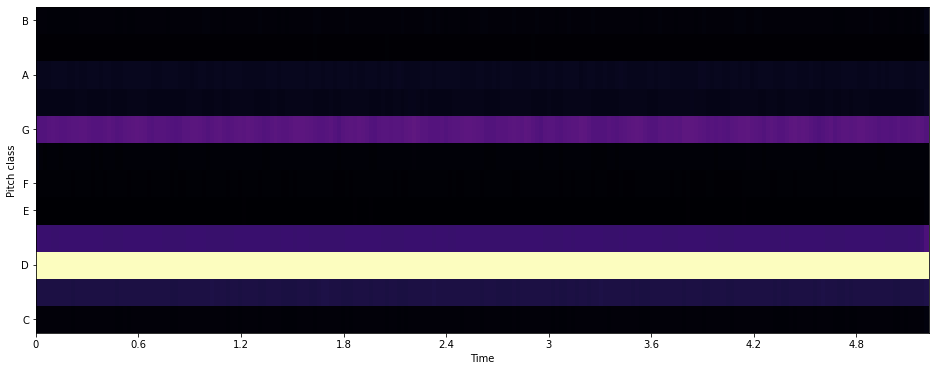

In [113]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512)
plt.show()